# Impact of small geometrical variations of a real solenoid on the produced magnetic field

In this notebook,  the impact of geometrical variations of a finite solenoid on the produced magnetic field is quantified as a test case for *CoilClassDesign*; the use of such solenoid is related to the calibration of the magnetic pick-up coils of RFX-mod2 experiment.

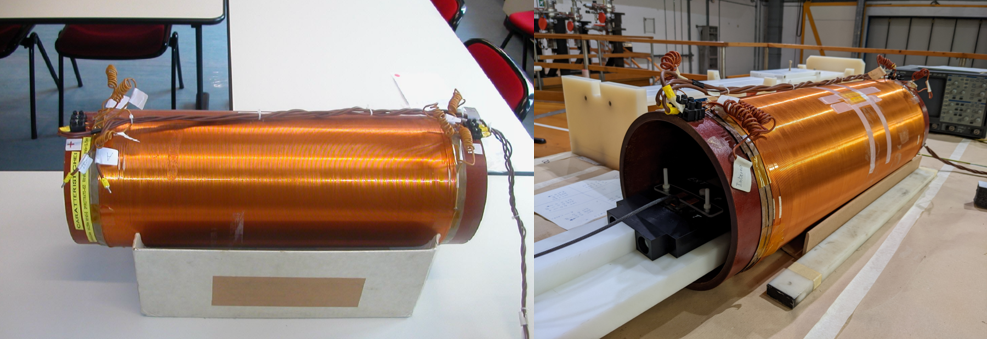

In particular, the following cases will be considered:
- impact of variations in length (*L*) of about ±0.5mm
- impact of variations in the radius (*r*) of about ±0.25mm
- impact of the eccentricity (*e*) of about 0.07 (measured) corresponding to an error of 0.28mm on one axis of the ellipse while the other is the nominal radius. 

Such small variations of geometrical values correspond to the possible error of measurement of the solenoid dimensions. 

Two methods are adopted: 
- “Numerical”, implementing Biot–Savart law numerically.
- “Analytical”, implementing the finite continuous solenoid [[1]]

[1]: <https://ntrs.nasa.gov/search.jsp?R=19980227402>

&nbsp; | External layer | Numerical |Analytical
:-:|:-:|:-:|:-:
Length| 545 mm| - |-
Num turns| 453| - |-
Diameter| 227 mm| - |-
Eq. inductance| 16.02 mH| 16.09 mH |-
**B** at axis| 0.96421 mT| 0.96422 mT | 0.96421 mT


Firstly, the *CoilClassDesign* class is imported and the different solenoid cases (i.e. coils) are defined.

In [1]:
from CoilClassDesign import *
#parameters
radius = 227e-3/2
length = 545e-3
Nturns = 453
pts_per_turn=800

# circular solenoid - reference case
c1 = Coil()
c1.define_Circular_Solenoid(radius,length,Nturns,pts_per_turn)
# length solenoid +0.5mm
c2 = Coil()
c2.define_Circular_Solenoid(radius,length+0.5e-3,Nturns,pts_per_turn)
# length  -0.5mm
c2m = Coil()
c2m.define_Circular_Solenoid(radius,length-0.5e-3,Nturns,pts_per_turn)
# radius + 0.25mm 
c3 = Coil()
c3.define_Circular_Solenoid(radius+0.25e-3,length,Nturns,pts_per_turn)
# radius -0.25mm
c3m = Coil()
c3m.define_Circular_Solenoid(radius-0.25e-3,length,Nturns,pts_per_turn)
# elliptic solenoid - eccentricity computed from exprimental measurements
bmeas = 219.95/2
ameas = 220.5/2
e=np.sqrt(1-(bmeas**2/ameas**2))
# e = 0.07
a = radius
b = np.sqrt(a**2 * (1-e**2))
(a-b)*1000
c4 = Coil()
c4.define_Elliptic_Solenoid(a=a, b=b, length=length, turns=Nturns,pts_per_turn=pts_per_turn)

Then, the magnetic field is computed at the axis of the solenoid. The relative percentage error with respect to the reference case is computed.

In [2]:
sensorPosition = np.array([[0, 0, length/2]])
c1.computeB(sensorPosition)
c2.computeB(sensorPosition)
c2m.computeB(sensorPosition)
c3.computeB(sensorPosition)
c3m.computeB(sensorPosition)
c4.computeB(sensorPosition)
B1 = -c1.B[0][2]
B2p = -c2.B[0][2]
B2m = -c2m.B[0][2]
B3p = -c3.B[0][2]
B3m = -c3m.B[0][2]
B4 = -c4.B[0][2]

e2p = (B2p-B1)/B1 *100
e2m = (B2m-B1)/B1 *100
e3p = (B3p-B1)/B1 *100
e3m = (B3m-B1)/B1 *100
e4 = (B4-B1)/B1 *100

print('-------------------B on axis(mT)-------------------')
print('Original: {0:.5f}'.format(B1))
print('L+0.5mm: {0:.5f}'.format(B2p))
print('L-0.5mm: {0:.5f}'.format(B2m))
print('R+0.25mm: {0:.5f}'.format(B3p))
print('R-0.25mm: {0:.5f}'.format(B3m))
print('eccentricity: {0:.5f}'.format(B4))

print('-------------------error (%)-------------------')
print('L+0.5mm: {0:.3f}'.format(e2p))
print('L-0.5mm: {0:.3f}'.format(e2m))
print('R+0.25mm: {0:.3f}'.format(e3p))
print('R-0.25mm: {0:.3f}'.format(e3m))
print('eccentricity : {0:.3f}'.format(e4))

total number of segments: 362399
number of field points: 1
total number of calculations: 362399
total number of segments: 362399
number of field points: 1
total number of calculations: 362399
total number of segments: 362399
number of field points: 1
total number of calculations: 362399
total number of segments: 362399
number of field points: 1
total number of calculations: 362399
total number of segments: 362399
number of field points: 1
total number of calculations: 362399
total number of segments: 362399
number of field points: 1
total number of calculations: 362399
-------------------B on axis(mT)-------------------
Original: 0.96422
L+0.5mm: 0.96347
L-0.5mm: 0.96497
R+0.25mm: 0.96390
R-0.25mm: 0.96453
eccentricity: 0.96440
-------------------error (%)-------------------
L+0.5mm: -0.078
L-0.5mm: 0.078
R+0.25mm: -0.033
R-0.25mm: 0.033
eccentricity : 0.018


The analytical calculations lead to:

In [3]:
z = 0
L=length
R = radius
B1 = 4*np.pi*1e-7 * Nturns * 1/2 * ((L/2 -z)/(L*np.sqrt(R**2+(L/2-z)**2)) + (L/2 +z)/(L*np.sqrt(R**2+(L/2+z)**2)))

# length +-0.5mm
L = length+0.5e-3
B2p = 4*np.pi*1e-7 * Nturns * 1/2 * ((L/2 -z)/(L*np.sqrt(R**2+(L/2-z)**2)) + (L/2 +z)/(L*np.sqrt(R**2+(L/2+z)**2)))
L = length-0.5e-3
B2m = 4*np.pi*1e-7 * Nturns * 1/2 * ((L/2 -z)/(L*np.sqrt(R**2+(L/2-z)**2)) + (L/2 +z)/(L*np.sqrt(R**2+(L/2+z)**2)))
e2p = (B2p-B1)/B1 *100
e2m = (B2m-B1)/B1 *100

L = length
R = radius+0.25e-3
B3p = 4*np.pi*1e-7 * Nturns * 1/2 * ((L/2 -z)/(L*np.sqrt(R**2+(L/2-z)**2)) + (L/2 +z)/(L*np.sqrt(R**2+(L/2+z)**2)))
R = radius-0.25e-3
B3m = 4*np.pi*1e-7 * Nturns * 1/2 * ((L/2 -z)/(L*np.sqrt(R**2+(L/2-z)**2)) + (L/2 +z)/(L*np.sqrt(R**2+(L/2+z)**2)))
e3p = (B3p-B1)/B1 *100
e3m = (B3m-B1)/B1 *100

print('-------------------B on axis(mT)-------------------')
print('Original: {0:.5f}'.format(B1*1000))
print('L+0.5mm: {0:.5f}'.format(B2p*1000))
print('L-0.5mm: {0:.5f}'.format(B2m*1000))
print('R+0.25mm: {0:.5f}'.format(B3p*1000))
print('R-0.25mm: {0:.5f}'.format(B3m*1000))

print('-------------------error (%)-------------------')
print('L+0.5mm: {0:.3f}'.format(e2p))
print('L-0.5mm: {0:.3f}'.format(e2m))
print('R+0.25mm: {0:.3f}'.format(e3p))
print('R-0.25mm: {0:.3f}'.format(e3m))

-------------------B on axis(mT)-------------------
Original: 0.96421
L+0.5mm: 0.96346
L-0.5mm: 0.96497
R+0.25mm: 0.96390
R-0.25mm: 0.96453
-------------------error (%)-------------------
L+0.5mm: -0.078
L-0.5mm: 0.078
R+0.25mm: -0.033
R-0.25mm: 0.033


The sensitivity analysis results are summarized in the table below:

<table>
    <thead>
        <tr>
            <th>&nbsp;</th>
            <th>&nbsp;</th>
            <th>Nominal geometry </th>
            <th>L+0.5mm </th>
            <th>L-0.5mm</th>
            <th>r+0.25mm</th>
            <th>r-0.25mm</th>
            <th>e=0.07</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=2>Numerical</td>
            <td>B(mT)</td>
            <td>0.96422</td>
            <td>0.96347</td>
            <td>0.96497</td>
            <td>0.96390</td>
            <td>0.96453</td>
            <td>0.96440</td>
        </tr>
        <tr>
            <td>$\epsilon$ (%)</td>
            <td> - </td>
            <td>-0.078</td>
            <td>0.078</td>
            <td>-0.033</td>
            <td>0.033</td>
            <td>0.018</td>
        </tr>
        <tr>
            <td rowspan=2>Analytical</td>
            <td>B(mT)</td>
            <td>0.96421</td>
            <td>0.96346</td>
            <td>0.96497</td>
            <td>0.96390</td>
            <td>0.96453</td>
            <td>-</td>
        </tr>
        <tr>
            <td>$\epsilon$ (%)</td>
            <td> - </td>
            <td>-0.078</td>
            <td>0.078</td>
            <td>-0.033</td>
            <td>0.033</td>
            <td>-</td>
        </tr>
        </tbody>
</table>